<a href="https://colab.research.google.com/github/2303A51965/2303A51965/blob/main/project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [4]:
cars = pd.read_csv('/content/CarPrice_Assignment.csv')

In [5]:
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


Since it is for understanding baseline SGD i will not be EDAing, encoding categorical features, etcetra.....

In [7]:
cars = cars[['drivewheel', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'horsepower', 'citympg', 'highwaympg', 'price']]

In [8]:
encoder = LabelEncoder()
cars['drivewheel'] = encoder.fit_transform(cars['drivewheel'])

In [9]:
cars.head()

,drivewheel,carlength,carwidth,curbweight,enginesize,horsepower,citympg,highwaympg,price
0,2,168.8,64.1,2548,130,111,21,27,13495.0
1,2,168.8,64.1,2548,130,111,21,27,16500.0
2,2,171.2,65.5,2823,152,154,19,26,16500.0
3,1,176.6,66.2,2337,109,102,24,30,13950.0
4,0,176.6,66.4,2824,136,115,18,22,17450.0


In [10]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   drivewheel  205 non-null    int64  
 1   carlength   205 non-null    float64
 2   carwidth    205 non-null    float64
 3   curbweight  205 non-null    int64  
 4   enginesize  205 non-null    int64  
 5   horsepower  205 non-null    int64  
 6   citympg     205 non-null    int64  
 7   highwaympg  205 non-null    int64  
 8   price       205 non-null    float64
dtypes: float64(3), int64(6)
memory usage: 14.5 KB


In [11]:
cars.shape

(205, 9)

In [12]:
y_train = cars.pop('price')
x_train  = cars

SDGRegressor + StandardScaler together work like a charm. Stochastic Gradient Descent is sensitive to feature scaling, so it is highly recommended to scale your data. For example, scale each attribute on the input vector X to 0,1 or -1,+1, or standardize it to have mean 0 and variance 1. Note that the same scaling must be applied to the test vector to obtain meaningful results. This can be easily done using StandardScaler

In [13]:
scaler = StandardScaler()
x_norm = scaler.fit_transform(x_train)
x_norm

array([[ 1.21333041, -0.42652147, -0.84478235, ...,  0.17448278,
        -0.64655303, -0.54605874],
       [ 1.21333041, -0.42652147, -0.84478235, ...,  0.17448278,
        -0.64655303, -0.54605874],
       [ 1.21333041, -0.23151305, -0.19056612, ...,  1.26453643,
        -0.95301169, -0.69162706],
       ...,
       [ 1.21333041,  1.19854871,  1.39824472, ...,  0.75753473,
        -1.10624102, -1.12833203],
       [ 1.21333041,  1.19854871,  1.39824472, ...,  0.04773235,
         0.11959362, -0.54605874],
       [ 1.21333041,  1.19854871,  1.39824472, ...,  0.25053303,
        -0.95301169, -0.83719538]])

In [14]:
SGD = SGDRegressor(max_iter=1000)
SGD.fit(x_norm, y_train)
print(SGD)

SGDRegressor()


In [15]:
print(f"No. of iterations:{SGD.n_iter_}")

No. of iterations:34


In [16]:
print(f"No. of weight updates:{SGD.t_}")

No. of weight updates:6971.0


*y = (coef_[0] X1) + (coef[1] * X2) + intercept

w1,w2..wn are the weights (coefficients) associated with each feature x1,x2....xn

b is the bias term (intercept), which is the constant part of the equation.**

In [17]:
b_norm = SGD.intercept_
w_norm = SGD.coef_

In [18]:
print(f"model parameters w: {w_norm}, b:{b_norm}")

model parameters w: [ 782.73414182 -256.36594317 1303.75085444 1168.28162686 3251.28788796
 1942.87907088  111.25114694   58.78393317], b:[13276.32455122]


Predict the targets of the training data. Use both "predict" and "compute using W and b"image.pngimage.png

In [19]:
y_pred_SGD = SGD.predict(x_norm)
y_pred = np.dot(x_norm, w_norm)  + b_norm

In [20]:
y_pred[:4]

array([13694.00661731, 13694.00661731, 18912.55723788, 10915.46557909])

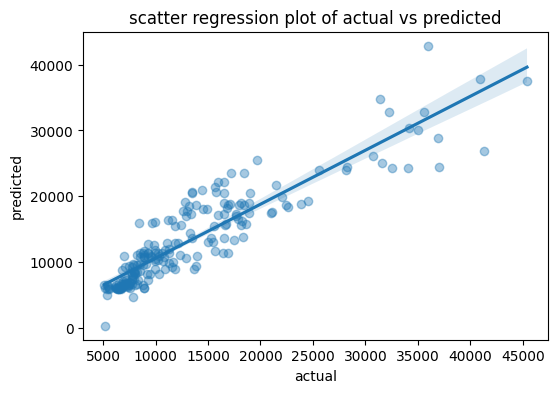

In [21]:
plt.figure(figsize=(6, 4))
sns.regplot(x=y_train, y=y_pred, data=cars, scatter_kws={'alpha':0.4})
plt.title('scatter regression plot of actual vs predicted')
plt.xlabel('actual')
plt.ylabel('predicted')
plt.show()

In [22]:
# Example: Actual and predicted values
actual = [1, 0, 1, 1, 0, 1, 0, 1, 0, 1]  # Actual labels
predicted = [1, 0, 1, 0, 0, 1, 1, 1, 0, 0]  # Predicted labels

# Calculate accuracy
correct_predictions = 0
for a, p in zip(actual, predicted):
    if a == p:
            correct_predictions += 1

            accuracy = correct_predictions / len(actual)
            print(f'Accuracy: {accuracy * 100}%')

Accuracy: 10.0%
Accuracy: 20.0%
Accuracy: 30.0%
Accuracy: 40.0%
Accuracy: 50.0%
Accuracy: 60.0%
Accuracy: 70.0%
